In [1]:
# Download data
import pandas as pd
import get_data
LoadData=True

if LoadData:
    get_data.get_data()

Baixando arquivos brasil.io...


In [2]:
dfSP = pd.read_csv("data/dados_municipios_SP.csv")
dfSP
dfSP.query('DRS == "{}"'.format('DRS 01 - Grande São Paulo'))

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,popEst,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,DRS
8326,2020-12-21,SP,Arujá,city,2757,110,253,True,89824.0,91157.0,3503901.0,3024.45232,0.0399,DRS 01 - Grande São Paulo
8327,2020-12-20,SP,Arujá,city,2753,110,252,False,89824.0,91157.0,3503901.0,3020.06428,0.0400,DRS 01 - Grande São Paulo
8328,2020-12-18,SP,Arujá,city,2728,110,251,False,89824.0,91157.0,3503901.0,2992.63907,0.0403,DRS 01 - Grande São Paulo
8329,2020-12-17,SP,Arujá,city,2709,108,250,False,89824.0,91157.0,3503901.0,2971.79591,0.0399,DRS 01 - Grande São Paulo
8330,2020-12-15,SP,Arujá,city,2675,107,249,False,89824.0,91157.0,3503901.0,2934.49762,0.0400,DRS 01 - Grande São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136227,2020-03-30,SP,Vargem Grande Paulista,city,2,1,5,False,52597.0,53468.0,3556453.0,3.74056,0.5000,DRS 01 - Grande São Paulo
136228,2020-03-27,SP,Vargem Grande Paulista,city,2,1,4,False,52597.0,53468.0,3556453.0,3.74056,0.5000,DRS 01 - Grande São Paulo
136229,2020-03-26,SP,Vargem Grande Paulista,city,1,1,3,False,52597.0,53468.0,3556453.0,1.87028,1.0000,DRS 01 - Grande São Paulo
136230,2020-03-25,SP,Vargem Grande Paulista,city,0,1,2,False,52597.0,53468.0,3556453.0,NaN,0.0000,DRS 01 - Grande São Paulo


In [3]:
# lista DRSs
DRS = list(dfSP["DRS"].unique())
DRS.remove("Indefinido")
DRS

['DRS 09 - Marília',
 'DRS 15 - São José do Rio Preto',
 'DRS 14 - São João da Boa Vista',
 'DRS 06 - Bauru',
 'DRS 16 - Sorocaba',
 'DRS 11 - Presidente Prudente',
 'DRS 05 - Barretos',
 'DRS 13 - Ribeirão Preto',
 'DRS 02 - Araçatuba',
 'DRS 07 - Campinas',
 'DRS 03 - Araraquara',
 'DRS 10 - Piracicaba',
 'DRS 17 - Taubaté',
 'DRS 08 - Franca',
 'DRS 01 - Grande São Paulo',
 'DRS 12 - Registro',
 'DRS 04 - Baixada Santista']

In [4]:
def load_confirmed(districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
#     df2=df2[self.start_date:]
    return df2

def load_dead(districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
#     df2=df2[self.start_date:]
    return df2

In [5]:
dfCases=load_confirmed('DRS 01 - Grande São Paulo')
dfCases = dfCases.dropna()
dfCases.tail(20)
dfCasesRaw=dfCases


In [6]:
import numpy as np

dfCases.index = pd.DatetimeIndex(dfCases.index)
dfCases = dfCases.reindex(pd.date_range(dfCases.index.min(), dfCases.index.max()), fill_value=np.nan)
dfCases = dfCases.interpolate(method='akima', axis=0).ffill().bfill()
dfCases=dfCases.astype(int)

dfCases.tail(30)

,
2020-11-24,560753
2020-11-25,565071
2020-11-26,567197
2020-11-27,568993
2020-11-28,571376
2020-11-29,572541
2020-11-30,573089
2020-12-01,576978
2020-12-02,580856
2020-12-03,584464


In [7]:
dfDeaths=load_dead('DRS 01 - Grande São Paulo')
dfDeaths =dfDeaths.apply (pd.to_numeric, errors='coerce')
dfDeaths = dfDeaths.dropna()
dfDeaths.tail(20)
dfDeathsRaw=dfDeaths

In [8]:
dfDeaths.index = pd.DatetimeIndex(dfDeaths.index)
dfDeaths = dfDeaths.reindex(pd.date_range(dfDeaths.index.min(), dfDeaths.index.max()), fill_value=np.nan)
dfDeaths = dfDeaths.interpolate(method='akima', axis=0).ffill().bfill()
dfDeaths=dfDeaths.astype(int)

dfDeaths.tail(30)

,
2020-11-24,23840
2020-11-25,23924
2020-11-26,24031
2020-11-27,24097
2020-11-28,24169
2020-11-29,24188
2020-11-30,24197
2020-12-01,24304
2020-12-02,24408
2020-12-03,24528


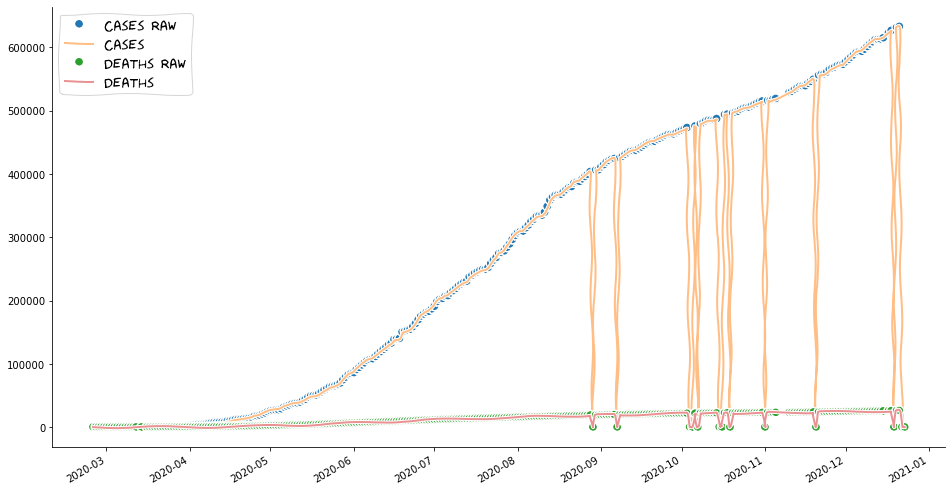

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))

with plt.xkcd():        
    dfCasesRaw.plot(ax=ax,label='Cases Raw',style='o')
    dfCases.plot(ax=ax,label='Cases',alpha=0.5)
    dfDeathsRaw.plot(ax=ax,label='Deaths Raw',style='o')
    dfDeaths.plot(ax=ax,label='Deaths',alpha=0.5)
    ax.legend(['Cases Raw','Cases', 'Deaths Raw','Deaths'])
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.show()

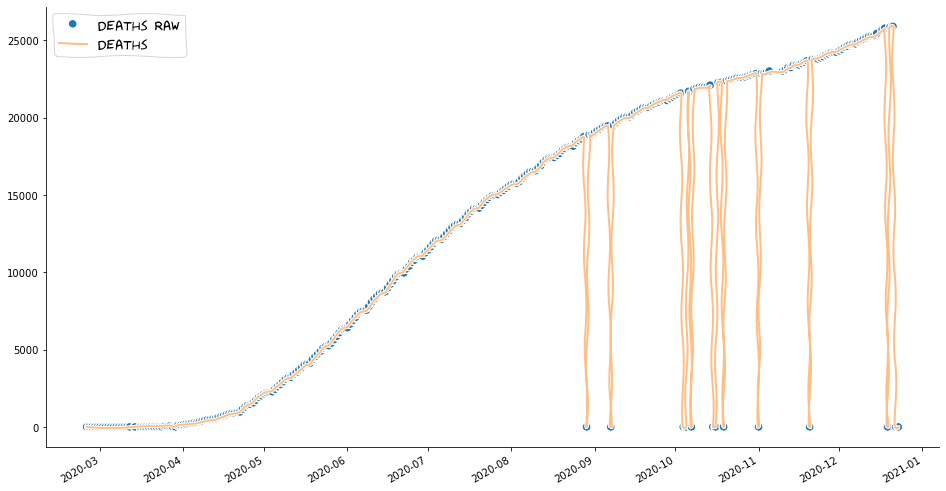

In [10]:
fig, ax = plt.subplots(figsize=(16,9))
with plt.xkcd():
    dfDeathsRaw.plot(ax=ax,label='Deaths Raw',style='o')
    dfDeaths.plot(ax=ax,label='Deaths',alpha=0.5)
    ax.legend(['Deaths Raw','Deaths'])
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.show()

In [11]:
# dfDeaths.index

In [12]:
# dfDeaths.index=dfDeaths.index.astype(str)
# dfDeaths.index